# Imports and Basic EDA

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
data = pd.read_csv('Dataset/zomato.csv')

In [3]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [6]:
data.shape

(51717, 17)

In [7]:
data.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
data.drop_duplicates(inplace=True)
data.shape

(51717, 17)

In [9]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# Data Cleaning

## Renaming Columns

In [10]:
data = data.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})

## Dropping Unnecessary Columns

In [11]:
del data['url']
del data['phone']
del data['address']
del data['dish_liked']
del data['reviews_list']

## Individual Columns

### Name 

In [12]:
data['name'].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ..., 'Nawabs Empire',
       'SeeYa Restaurant',
       'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...'],
      dtype=object)

In [13]:
data['name'].astype('string')

0                                                    Jalsa
1                                           Spice Elephant
2                                          San Churro Cafe
3                                    Addhuri Udupi Bhojana
4                                            Grand Village
                               ...                        
51712    Best Brews - Four Points by Sheraton Bengaluru...
51713                             Vinod Bar And Restaurant
51714    Plunge - Sheraton Grand Bengaluru Whitefield H...
51715    Chime - Sheraton Grand Bengaluru Whitefield Ho...
51716                         The Nest - The Den Bengaluru
Name: name, Length: 51717, dtype: string

In [14]:
data['name'] = data['name'].str.title()

In [15]:
print(data['name'].value_counts())

name
Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  74
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Hotel Nisarga                                               1
Vishal Sweets, Snacks & Breakfast                           1
Thali15                                                     1
Mast Biryani - Night Express                                1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: count, Length: 8743, dtype: int64


### Online Orders and Book Table

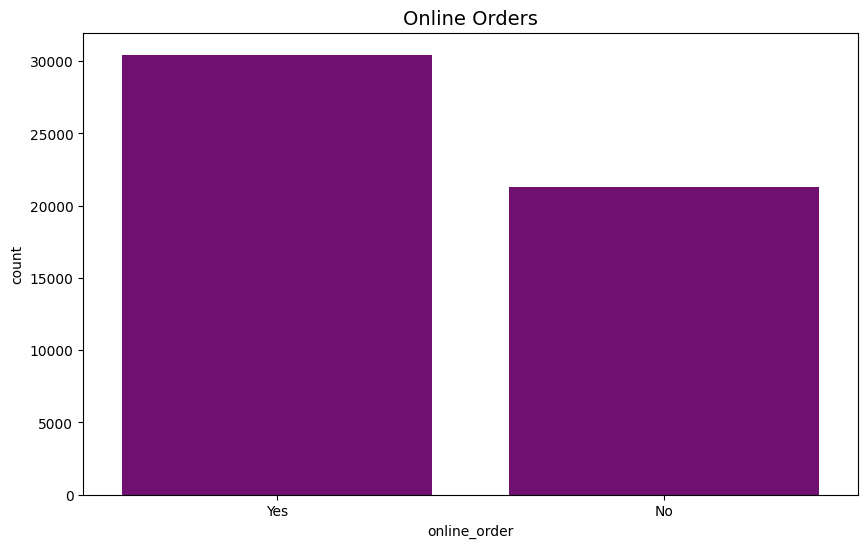

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(data['online_order'].value_counts(),color='purple')
plt.title('Online Orders', fontsize=14)
plt.show()

In [17]:
data.online_order.replace(('Yes','No'),(True, False),inplace=True)

C:\Users\danyadanish\AppData\Local\Temp\ipykernel_20276\4191232955.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.online_order.replace(('Yes','No'),(True, False),inplace=True)
C:\Users\danyadanish\AppData\Local\Temp\ipykernel_20276\4191232955.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True

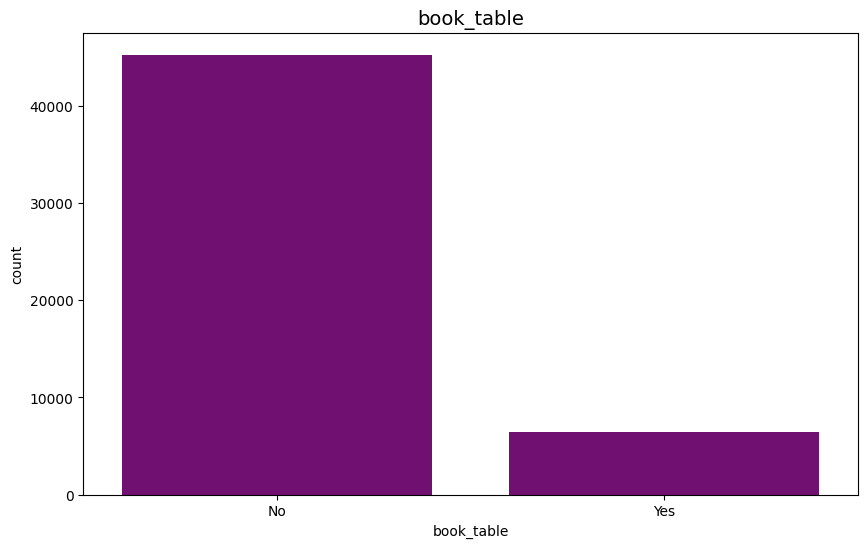

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(data['book_table'].value_counts(),color='purple')
plt.title('book_table', fontsize = 14)
plt.show()

In [19]:
data['book_table'].replace(('Yes','No'),(True, False),inplace=True)

C:\Users\danyadanish\AppData\Local\Temp\ipykernel_20276\4097203721.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['book_table'].replace(('Yes','No'),(True, False),inplace=True)
C:\Users\danyadanish\AppData\Local\Temp\ipykernel_20276\4097203721.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tru

In [20]:
temp_data = data[['online_order', 'book_table']].copy()
temp_data['online_order'].replace((True, False), (1, 0), inplace=True)
temp_data['book_table'].replace((True, False), (1, 0), inplace=True)

C:\Users\danyadanish\AppData\Local\Temp\ipykernel_20276\3160817282.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  temp_data['online_order'].replace((True, False), (1, 0), inplace=True)
C:\Users\danyadanish\AppData\Local\Temp\ipykernel_20276\3160817282.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', 

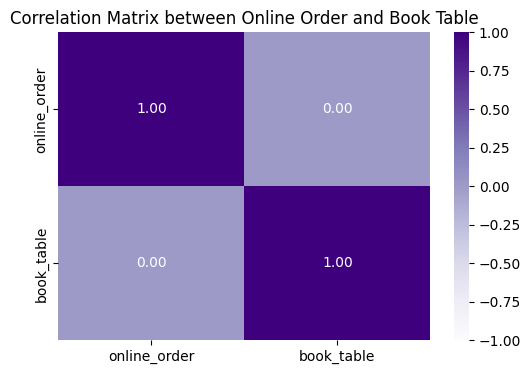

In [21]:
correlation_matrix = data[['online_order', 'book_table']].corr()
plt.figure(figsize=(6, 4)) 
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix between Online Order and Book Table')
plt.show()

### Rate

In [22]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [23]:
data['rate'] = data['rate'].replace(['NEW', '-'], np.nan)

data['rate'] = data['rate'].apply(lambda x: float(str(x).split('/')[0]) if isinstance(x, str) and '/' in x else x)

data['rate'] = pd.to_numeric(data['rate'], errors='coerce')




In [24]:
median_rate_by_name = data.groupby('name')['rate'].median()

def impute_rate(row):
    if pd.isna(row['rate']):
        return median_rate_by_name.get(row['name'], np.nan)  # Fallback to NaN if no median exists
    return row['rate']


data['rate'] = data.apply(impute_rate, axis=1)


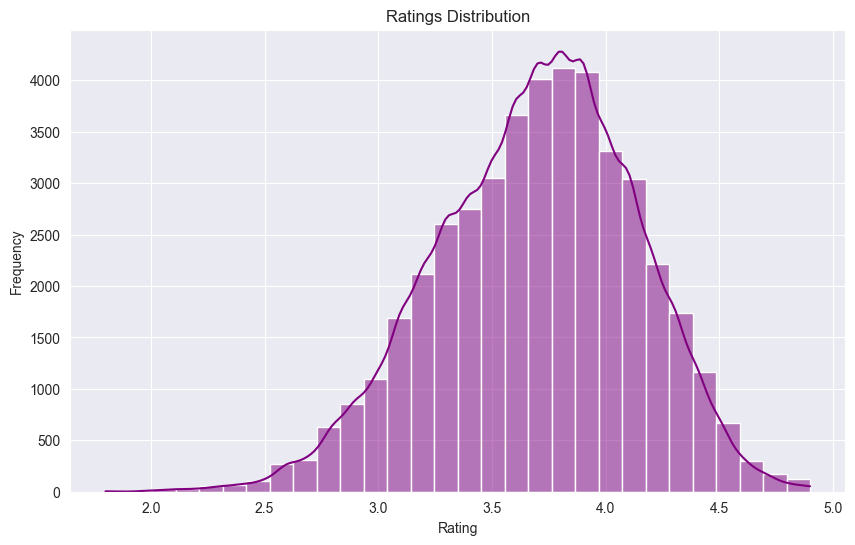

In [25]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.histplot(data['rate'].dropna(), kde=True, bins=30, color='purple')
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

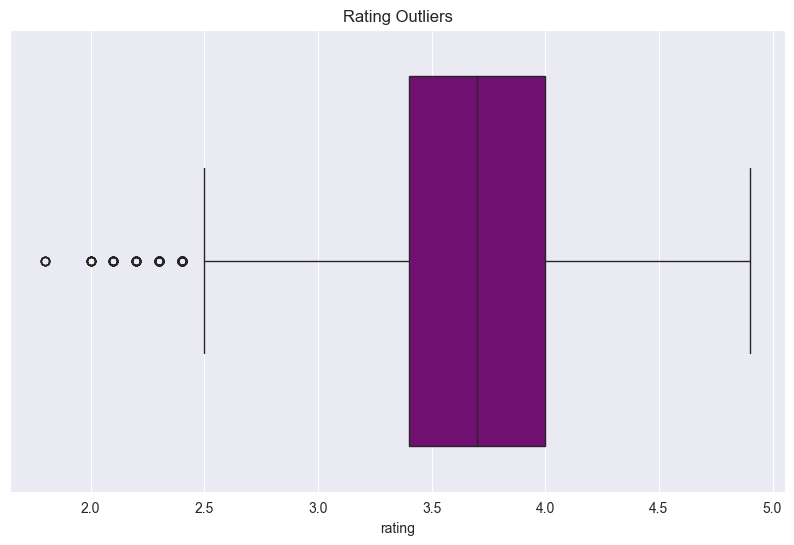

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['rate'].dropna(), color ='purple')
plt.xlabel('rating')
plt.title('Rating Outliers')
plt.show()

In [27]:
if data['rate'].isna().any():
    scaler = MinMaxScaler(feature_range=(1, 5))
 
    scaled_ratings = scaler.fit_transform(data[['rate']].fillna(0))
    
    temp = pd.DataFrame(scaled_ratings, columns=['scaled rating'])
    
    # Assign NaN to the positions where original ratings were missing
    temp['scaled rating'] = temp['scaled rating'].mask(data['rate'].isna(), np.nan)
    
    data['rate'] = data.groupby('name')['rate'].transform(
        lambda x: x.fillna(x.median())
    )
    
    data[['rate']] = scaler.fit_transform(data[['rate']]).round(2)


C:\Users\danyadanish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\danyadanish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\danyadanish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\danyadanish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarnin

<Axes: xlabel='rate'>

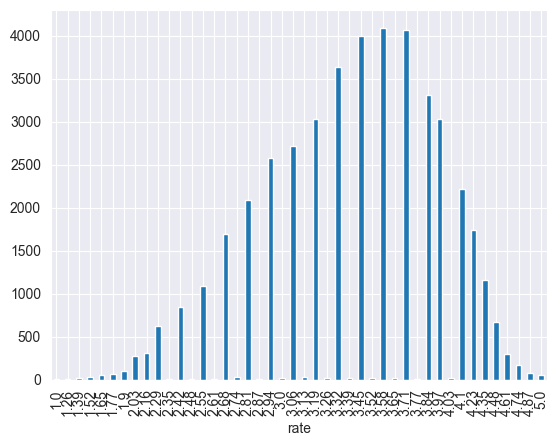

In [28]:
data['rate'].value_counts().sort_index().plot.bar()

### Cost

In [29]:
data['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [30]:
data['cost'] = data['cost'].str.replace(',','')

In [31]:
print(data['cost'].dtype)

object


In [32]:
data['cost'].isna().sum()

346

In [33]:
data['cost'] = data['cost'].astype('float')

<Axes: xlabel='cost', ylabel='Count'>

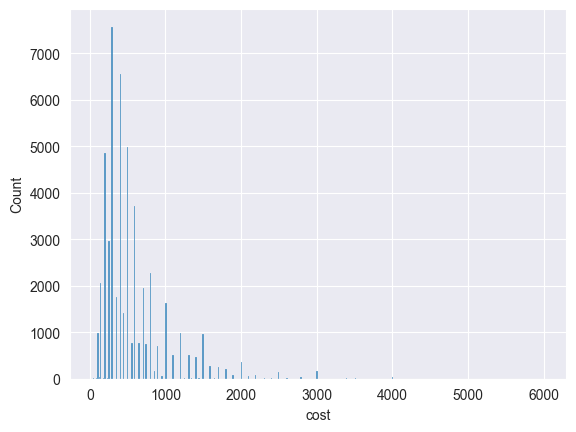

In [34]:
sns.histplot(data['cost'])

In [35]:
data['cost'] = data.groupby('name')['cost'].transform(lambda x: x.fillna(x.median()))

C:\Users\danyadanish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\danyadanish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\danyadanish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\danyadanish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarnin

### Votes

In [36]:
data['votes'].unique()

array([ 775,  787,  918, ..., 4957, 2382,  843], dtype=int64)

In [37]:
data.votes.describe()

count    51717.000000
mean       283.697527
std        803.838853
min          0.000000
25%          7.000000
50%         41.000000
75%        198.000000
max      16832.000000
Name: votes, dtype: float64

In [38]:
data.votes.isna().sum()

0

<Axes: ylabel='Frequency'>

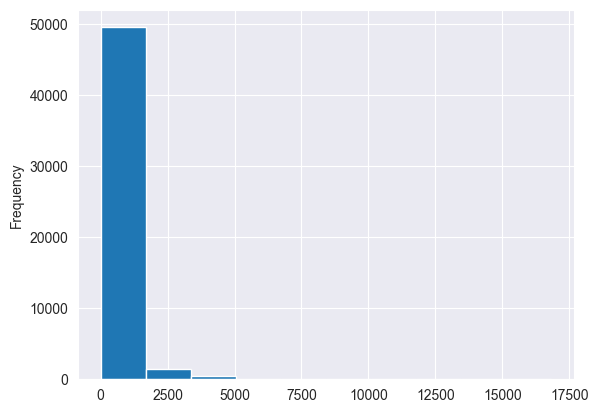

In [39]:
data['votes'].plot.hist()
#We can infer that the data is skewed to the right.Hence we need to perform the transformation or we can just simply remove the outliers.

### Location

In [40]:
data['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [41]:
data['location'].astype('string')

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51712                    Whitefield
51713                    Whitefield
51714                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location, Length: 51717, dtype: string

In [42]:
data['location'].isna().sum()

21

In [43]:
data = data.dropna(subset='location')

In [44]:
data['location'].isna().sum()

0

### Restaurant Type

In [45]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [46]:
data['rest_type'].nunique()  # 93 unique values

# Cleaning and formatting the text in 'rest_type' column
data['rest_type'] = data['rest_type'].str.lower().str.strip()
data['rest_type'] = data['rest_type'].str.split(', ')
data['rest_type'] = data['rest_type'].fillna('')

In [47]:
standardization_map = {
    'casual dining': 'casual dining',
    'quick bites': 'quick bites',
    'cafe': 'cafe',
    'bar': 'bar',
    'pub': 'bar',  
    'microbrewery': 'microbrewery',
    'lounge': 'lounge',
    'fine dining': 'fine dining',
    'bakery': 'bakery',
    'delivery': 'delivery',
    'takeaway': 'takeaway',
    'beverage shop': 'beverage shop',
    'dessert parlor': 'dessert parlor',
    'sweet shop': 'sweet shop',
    'food court': 'food court',
    'kiosk': 'kiosk',
    'club': 'club',
    'mess': 'mess',
    'bhojanalya': 'bhojanalya',
    'pop up': 'pop up',
    'meat shop': 'meat shop',
    'irani cafee': 'irani cafe'
}

In [48]:
data['rest_type'] = data['rest_type'].apply(lambda types: list({standardization_map.get(t.strip(), t) for t in types}))
data['rest_type'] = data['rest_type'].apply(lambda x: ', '.join(x))

In [49]:
data['rest_type'].nunique()
data['rest_type'].unique()

array(['casual dining', 'casual dining, cafe', 'quick bites', 'cafe',
       'quick bites, cafe', 'delivery', 'mess', 'dessert parlor',
       'dessert parlor, bakery', 'bar', 'bakery', 'takeaway, delivery',
       'fine dining', 'beverage shop', 'sweet shop',
       'beverage shop, quick bites', 'confectionery',
       'quick bites, beverage shop', 'dessert parlor, sweet shop',
       'quick bites, bakery', 'quick bites, sweet shop', 'kiosk',
       'food truck', 'quick bites, dessert parlor',
       'beverage shop, dessert parlor', 'takeaway', 'casual dining, bar',
       'microbrewery, casual dining', 'lounge', 'food court',
       'bakery, cafe', '', 'dhaba', 'microbrewery',
       'quick bites, food court', 'lounge, bar',
       'dessert parlor, food court', 'sweet shop, casual dining',
       'casual dining, food court', 'beverage shop, bakery',
       'lounge, casual dining', 'cafe, food court', 'beverage shop, cafe',
       'dessert parlor, cafe', 'microbrewery, bar', 'bakery, 

### Cuisines

In [50]:
#cuisines
data['cuisines'].nunique()
data['cuisines'].unique().tolist() 

['North Indian, Mughlai, Chinese',
 'Chinese, North Indian, Thai',
 'Cafe, Mexican, Italian',
 'South Indian, North Indian',
 'North Indian, Rajasthani',
 'North Indian',
 'North Indian, South Indian, Andhra, Chinese',
 'Pizza, Cafe, Italian',
 'Cafe, Italian, Continental',
 'Cafe, Mexican, Italian, Momos, Beverages',
 'Cafe',
 'Cafe, Chinese, Continental, Italian',
 'Cafe, Continental',
 'Cafe, Fast Food, Continental, Chinese, Momos',
 'Chinese, Cafe, Italian',
 'Cafe, Italian, American',
 'Cafe, French, North Indian',
 'Cafe, Pizza, Fast Food, Beverages',
 'Cafe, Fast Food',
 'Italian, Fast Food, Cafe, European',
 'Cafe, Bakery',
 'Cafe, South Indian',
 'Cafe, Fast Food, Beverages',
 'North Indian, Cafe, Chinese, Fast Food',
 'Cafe, Italian',
 'North Indian, Fast Food, Chinese, Burger',
 'Bakery, Desserts',
 'Pizza',
 'North Indian, Biryani, Fast Food',
 'Biryani',
 'North Indian, Chinese, Fast Food',
 'Chinese, Thai, Momos',
 'North Indian, Mughlai, South Indian, Chinese',
 'South I

In [51]:
print(data['cuisines'].str.strip().str.split(', ').explode().unique())


['North Indian' 'Mughlai' 'Chinese' 'Thai' 'Cafe' 'Mexican' 'Italian'
 'South Indian' 'Rajasthani' 'Andhra' 'Pizza' 'Continental' 'Momos'
 'Beverages' 'Fast Food' 'American' 'French' 'European' 'Bakery' 'Burger'
 'Desserts' 'Biryani' 'Street Food' 'Rolls' 'Ice Cream' 'Healthy Food'
 'Salad' 'Asian' 'Korean' 'Indonesian' 'Japanese' 'Goan' 'Seafood' 'Kebab'
 'Steak' 'Mithai' 'Iranian' 'Sandwich' 'Juices' 'Mangalorean' 'Vietnamese'
 'Hyderabadi' 'Bengali' 'Arabian' 'BBQ' 'Tea' 'Afghani' 'Lebanese'
 'Finger Food' 'Tibetan' nan 'Charcoal Chicken' 'Middle Eastern'
 'Mediterranean' 'Wraps' 'Kerala' 'Oriya' 'Bihari' 'Roast Chicken'
 'Maharashtrian' 'Bohri' 'African' 'Nepalese' 'Turkish' 'Tamil' 'Tex-Mex'
 'Belgian' 'Gujarati' 'South American' 'Konkan' 'Drinks Only' 'Awadhi'
 'Chettinad' 'Coffee' 'Indian' 'Afghan' 'Modern Indian' 'Lucknowi'
 'Australian' 'Kashmiri' 'Spanish' 'Malaysian' 'Burmese' 'Sushi'
 'Portuguese' 'Parsi' 'Greek' 'North Eastern' 'Bar Food' 'Singaporean'
 'Naga' 'Cantonese' 

In [52]:
specific_mapping = {
    "North Indian": [
        "North Indian", "Punjabi", "Awadhi", "Kashmiri", "Lucknowi", "Rajasthani"
    ],
    "South Indian": [
        "South Indian", "Andhra", "Chettinad", "Hyderabadi", "Mangalorean", "Kerala"
    ],
    "East Indian": [
        "Bengali", "Oriya", "Assamese", "North Eastern", "Naga"
    ],
    "West Indian": [
        "Maharashtrian", "Gujarati", "Goan", "Konkan", "Malwani"
    ],
    "Asian": [
        "Chinese", "Thai", "Japanese", "Korean", "Indonesian", "Vietnamese",
        "Singaporean", "Cantonese", "Mongolian", "Sri Lankan", "Malaysian", "Burmese"
    ],
    "European": [
        "Italian", "French", "Continental", "Greek", "Portuguese", "Spanish",
        "German", "British", "Russian", "Belgian"
    ],
    "Middle Eastern": [
        "Lebanese", "Arabian", "Afghani", "Turkish", "Iranian", "Afghan"
    ],
    "American": [
        "American", "BBQ", "Tex-Mex", "Burger", "Hot dogs", "Steak"
    ],
    "Desserts": [
        "Ice Cream", "Mithai", "Desserts", "Paan", "Bubble Tea"
    ],
    "Fast Food": [
        "Pizza", "Biryani", "Street Food", "Rolls", "Sandwich", "Finger Food", "Charcoal Chicken", "Roast Chicken"
    ],
    "Beverages": [
        "Juices", "Tea", "Coffee", "Beverages", "Drinks Only"
    ],
    "Seafood": [
        "Seafood", "Goan", "Malwani", "Konkan"
    ],
    "Healthy": [
        "Salad", "Healthy Food", "Vegan", "Raw Meats"
    ],
    "Fusion": [
        "Modern Indian", "Tex-Mex", "Pan Asian", "Bar Food", "Grill"
    ],
    "Specialty": [
        "Sushi", "Steak", "Kebab", "Charcoal Chicken", "Roast Chicken"
    ],
    "Bakery": [
        "Bakery", "Pastries", "Cakes"
    ]
}



def map_cuisine_specific(cuisine):
    for category, cuisines in specific_mapping.items():
        if cuisine in cuisines:
            return category
    return cuisine


def map_cuisine_list(cuisine_list):
    if isinstance(cuisine_list, list):
        return list({map_cuisine_specific(c.strip()) for c in cuisine_list})
    elif isinstance(cuisine_list, str): 
        return [map_cuisine_specific(cuisine_list.strip())]
    return [cuisine_list.str] 

In [53]:
data['cuisines'] = data['cuisines'].astype('string')

In [54]:
data['cuisines'] = data['cuisines'].str.strip()
data['cuisines'] = data['cuisines'].str.split(', ')

In [55]:
data['cuisines'] = data['cuisines'].fillna('')

In [56]:
data['cuisines'] = data['cuisines'].apply(map_cuisine_list)
data['cuisines'] = data['cuisines'].apply(lambda x: ', '.join(x))
data['cuisines'].nunique()

834

In [57]:
data['cuisines'].sample(30)

8574                                              Desserts
34714                                            Fast Food
14377                           South Indian, North Indian
39545    Fast Food, North Indian, Asian, Beverages, Sou...
13584                                 Fast Food, Beverages
39413                           South Indian, North Indian
36321                                  Fast Food, Desserts
26049                                  Fast Food, American
11391                                                Asian
30679         Asian, South Indian, Fast Food, North Indian
8132                                   Fast Food, European
48986                           Fast Food, Beverages, Cafe
7688                                      Desserts, Bakery
14735                  Fast Food, American, Cafe, European
19720       Fast Food, Desserts, American, Cafe, Beverages
48293                       Seafood, West Indian, Desserts
33290                                            Beverag

### Menu Item

In [58]:
data['menu_item'].unique()

array(['[]',
       "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'Chees

In [59]:
def replace_inner_brackets(s):
    # This will replace square brackets with round brackets inside the string
    return re.sub(r'\[([^\[\]]+)\]', r'(\1)', s)

data['menu_item'] = data['menu_item'].apply(replace_inner_brackets)

In [60]:
data['menu_item'].astype('string')

0        []
1        []
2        []
3        []
4        []
         ..
51712    []
51713    []
51714    []
51715    []
51716    []
Name: menu_item, Length: 51696, dtype: string

In [61]:
data['menu_item'].unique()

array(['[]',
       "('Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'Chees

In [62]:
data[data['menu_item'] == '[]'].count()

name            39596
online_order    39596
book_table      39596
rate            32773
votes           39596
location        39596
rest_type       39596
cuisines        39596
cost            39459
menu_item       39596
type            39596
city            39596
dtype: int64

### Type

In [63]:
data['type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [64]:
data['type'].astype('string')

0               Buffet
1               Buffet
2               Buffet
3               Buffet
4               Buffet
             ...      
51712    Pubs and bars
51713    Pubs and bars
51714    Pubs and bars
51715    Pubs and bars
51716    Pubs and bars
Name: type, Length: 51696, dtype: string

### City

In [65]:
data['city'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [66]:
data['city'].astype('string')

0        Banashankari
1        Banashankari
2        Banashankari
3        Banashankari
4        Banashankari
             ...     
51712      Whitefield
51713      Whitefield
51714      Whitefield
51715      Whitefield
51716      Whitefield
Name: city, Length: 51696, dtype: string

## Correlations Between Numeric Attributes

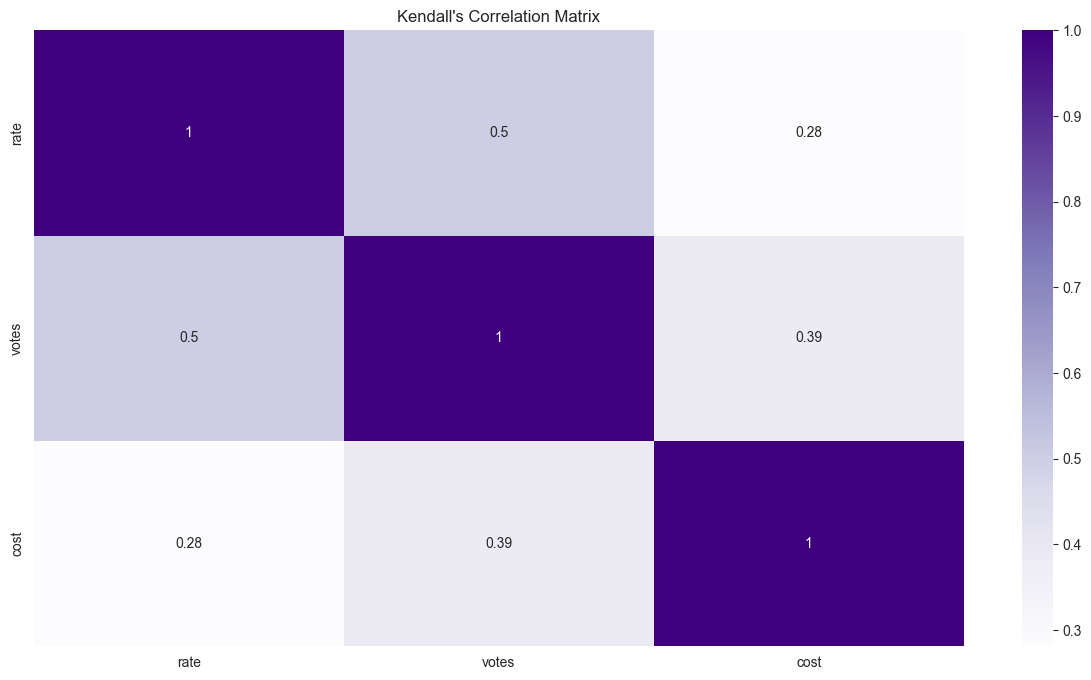

In [67]:
numeric_data = data.select_dtypes(include=['number'])

corr = numeric_data.corr(method='kendall')

plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap='Purples')
plt.title("Kendall's Correlation Matrix")
plt.show()

## Categorical Outliers

*Identifying categorical outliers by checking the distribution*

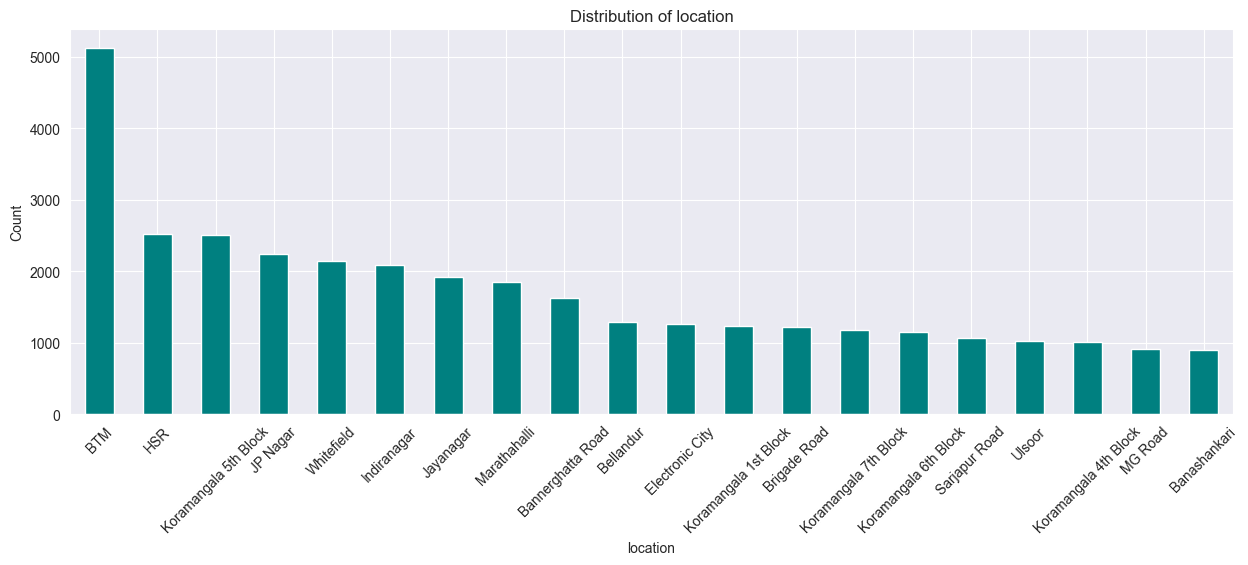

Top 10 most frequent location values:

location
BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
Indiranagar              2083
Jayanagar                1926
Marathahalli             1846
Bannerghatta Road        1630
Bellandur                1286
Name: count, dtype: int64
Top 10 least frequent location values:

location
Hebbal                  14
North Bangalore         14
Kengeri                  9
Nagarbhavi               9
Central Bangalore        8
West Bangalore           6
Yelahanka                6
Jakkur                   3
Rajarajeshwari Nagar     2
Peenya                   1
Name: count, dtype: int64


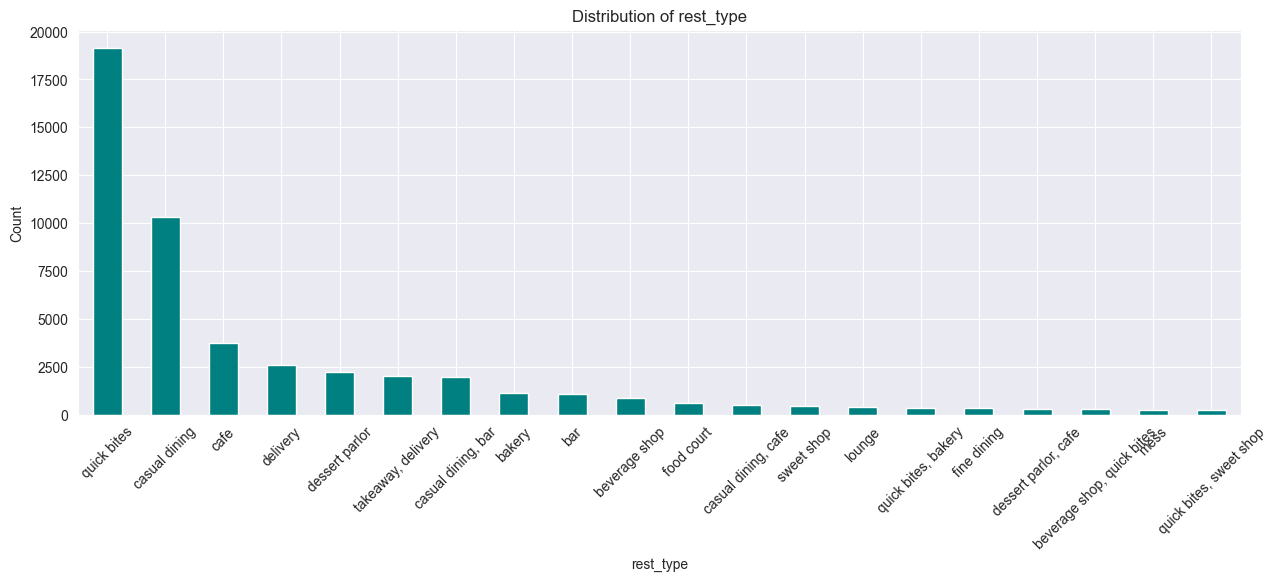

Top 10 most frequent rest_type values:

rest_type
quick bites           19132
casual dining         10330
cafe                   3732
delivery               2604
dessert parlor         2263
takeaway, delivery     2037
casual dining, bar     1961
bakery                 1141
bar                    1099
beverage shop           867
Name: count, dtype: int64
Top 10 least frequent rest_type values:

rest_type
casual dining, club          4
quick bites, meat shop       4
bhojanalya                   3
sweet shop, bakery           3
cafe, food court             2
dessert parlor, kiosk        2
pop up                       2
bakery, food court           2
beverage shop, food court    2
quick bites, kiosk           1
Name: count, dtype: int64


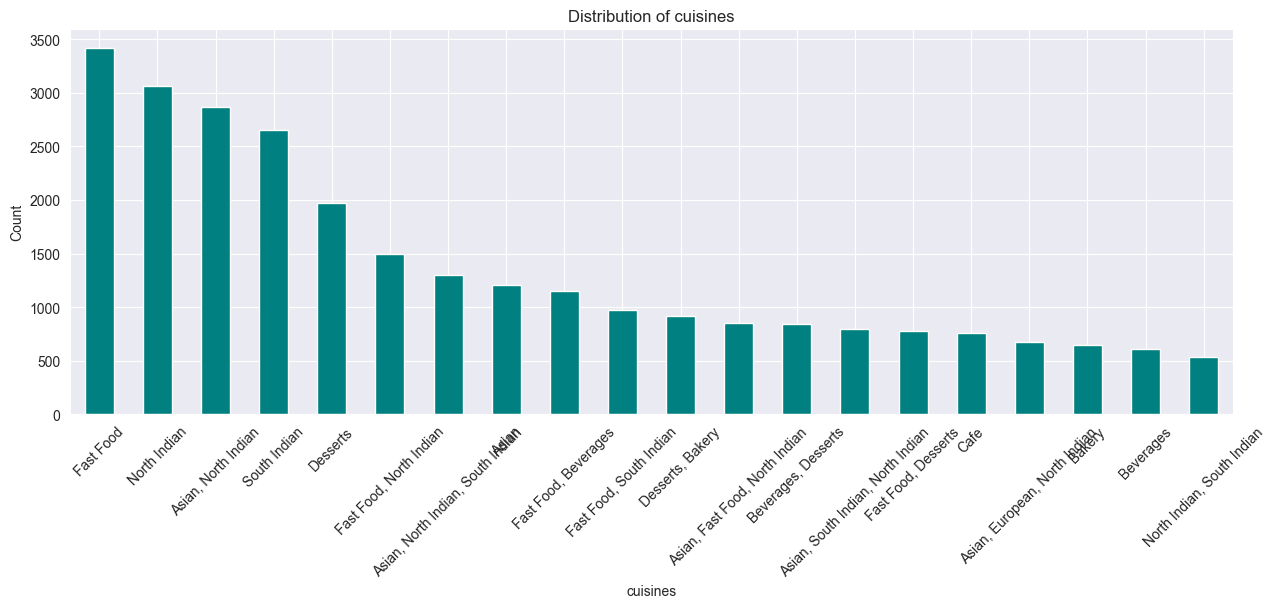

Top 10 most frequent cuisines values:

cuisines
Fast Food                            3420
North Indian                         3062
Asian, North Indian                  2865
South Indian                         2654
Desserts                             1973
Fast Food, North Indian              1497
Asian, North Indian, South Indian    1303
Asian                                1205
Fast Food, Beverages                 1149
Fast Food, South Indian               977
Name: count, dtype: int64
Top 10 least frequent cuisines values:

cuisines
West Indian, Desserts                                       1
Asian, Seafood, Specialty, North Indian                     1
South Indian, European, Mughlai, North Indian               1
Fast Food, West Indian, Mughlai                             1
Asian, East Indian, Desserts, North Indian                  1
Beverages, American                                         1
Asian, Beverages, East Indian, North Indian                 1
Fast Food, East Indian,

In [68]:
categorical_columns = ['location', 'rest_type', 'cuisines']

for col in categorical_columns:
    plt.figure(figsize=(15, 5))
    data[col].value_counts().head(20).plot(kind='bar', color='teal')  # Show top 20 categories
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

    print(f"Top 10 most frequent {col} values:\n")
    print(data[col].value_counts().head(10))
    print(f"Top 10 least frequent {col} values:\n")
    print(data[col].value_counts().tail(10))  

## Numerical Outliers

*Before removing numerical outliers*


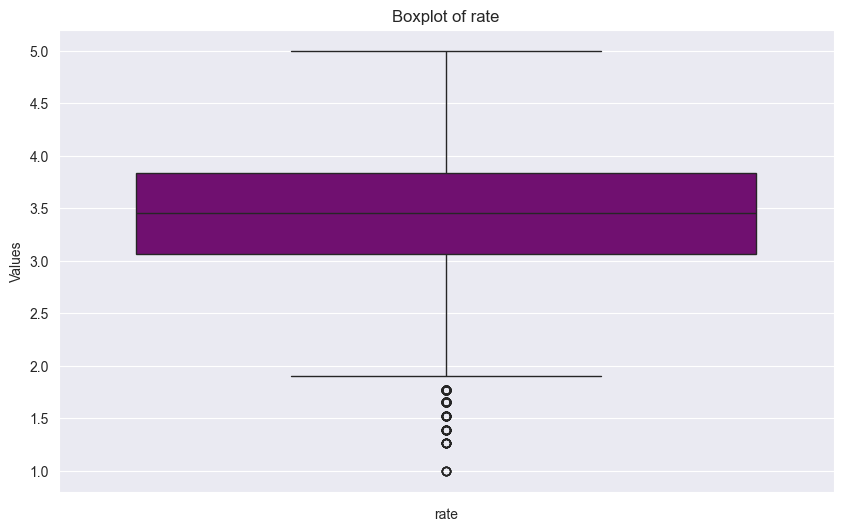

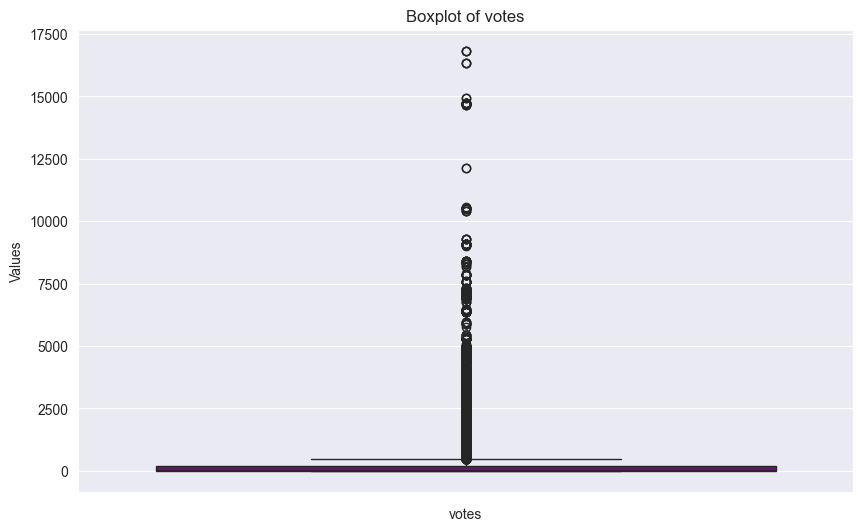

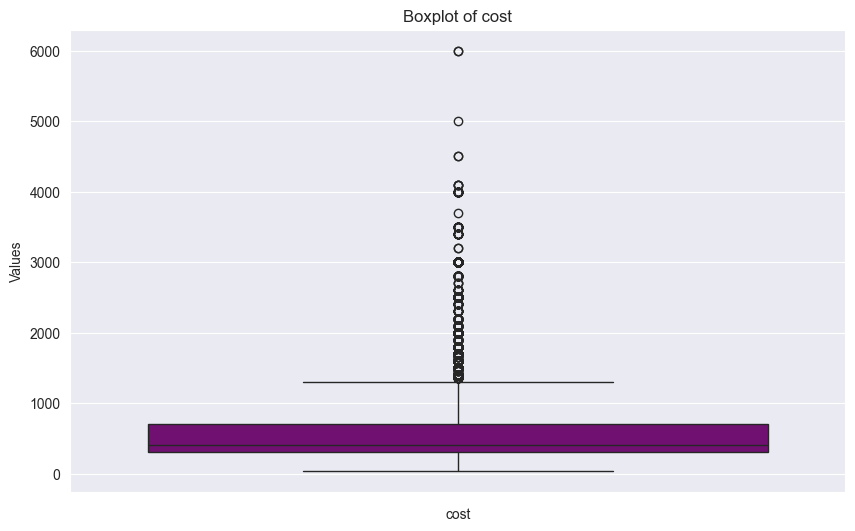

In [69]:
for col in numeric_data:
    if not data[col].empty:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data[col].dropna(),color='Purple')
        plt.title(f"Boxplot of {col}")
        plt.xlabel(col)
        plt.ylabel('Values')
        plt.show()

In [70]:
def remove_outliers(data, columns):
    for column in columns:
        data = data.dropna(subset=[column])
        
        Q1 = np.percentile(data[column], 25)
        Q3 = np.percentile(data[column], 75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
       
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
        
    return data

data = remove_outliers(data, ['cost', 'votes'])  


*After removing numerical outliers from votes and cost*

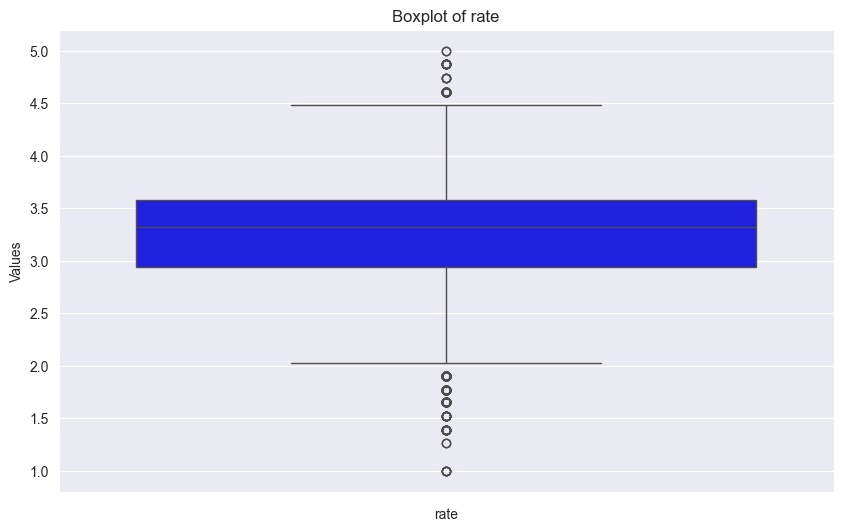

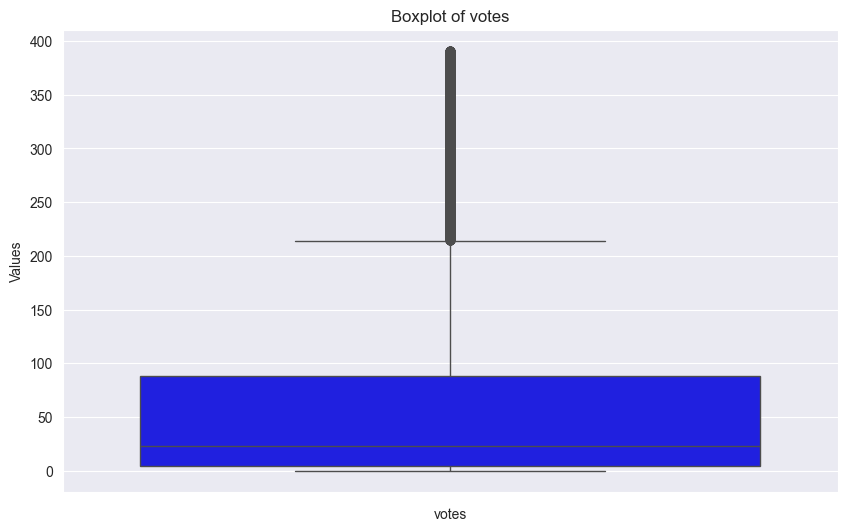

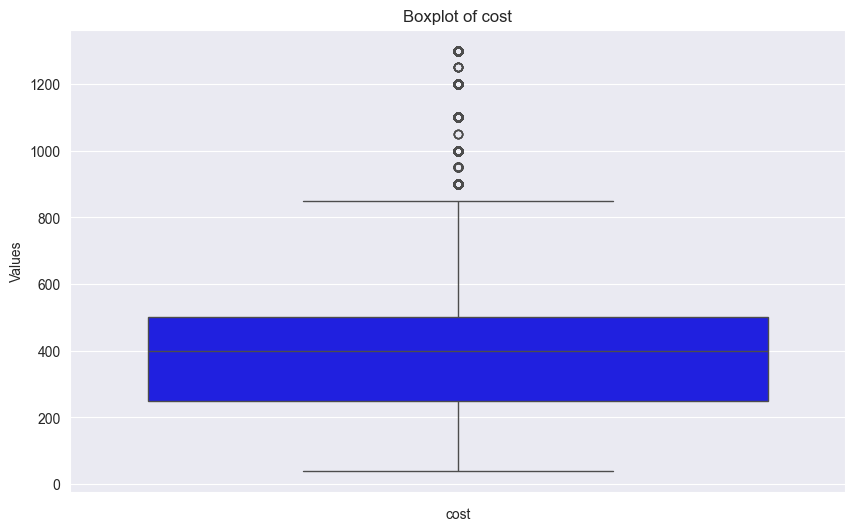

In [71]:
for col in numeric_data:
    if not data[col].empty:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data[col].dropna(), color='blue')
        plt.title(f"Boxplot of {col}")
        plt.xlabel(col)
        plt.ylabel('Values')
        plt.show()

# Research Questions

## Topic 1: Reviews and Rating

Mariam El Gamal

### Question 1: 

### Question 2: 

## Topic 2: Cuisine Analysis
Farida Ismail

### Question 1:

### Question 2: 

## Topic 3: Customer Preferences
Danya Danish

### Question 1:

### Question 2: 

## Topic 4: Correlations and Patterns
Maryam Kashif

### Question 1: 

### Question 2: 